<a href="https://colab.research.google.com/github/LNSHRIVAS/Gradient-descent-from-scratch/blob/main/Gradient_Descent_Optimization_with_Backtracking_and_Exact_Line_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
P = np.array([[3, 4], [4, 6]])
q = np.array([-2, 4])
x0 = np.array([1, 2])
stop_condition = 1e-2
p2 = np.array([[5.005, 4.995], [4.995, 5.005]])

In [ ]:
def func(x, new_p):
  x = np.array(x)
  t1 = 0.5 * x.T @ new_p @ x
  t2 = q.T @ x
  t3 = np.log(np.exp(-2 * x[0]) + np.exp(-x[1]))
  return t1 + t2 + t3

In [ ]:
def gradient(x, new_p):
  x = np.array(x)
  grad_t1 = new_p @ x
  grad_t2 = q
  derivative = np.exp(-2 * x[0]) + np.exp(-x[1])
  grad_t3 = np.array([-2 * np.exp(-2 * x[0]), -np.exp(-x[1])]) / derivative
  return grad_t1 + grad_t2 + grad_t3

# (A) Gradient Descent Usnig Exact Line Search

In [ ]:
def exact_line_search(x, direction, new_p):
    x = np.array(x)
    alpha = -direction @ gradient(x, new_p) / (direction @ new_p @ direction)
    return alpha

In [ ]:
def gradient_descent_by_exact_line_search(x0, stop_condition, new_p):
    x = x0
    iter = 0
    path = []
    value = []
    while True:
        direction = -gradient(x, new_p)
        path.append(x)
        value.append(func(x, new_p))
        if np.linalg.norm(direction) < stop_condition:
            break

        alpha = exact_line_search(x, direction, new_p)
        x = x + alpha*direction
        iter += 1
    print(f"Iteration {iter}: x = {x}, f(x) = {func(x,new_p)}")
    return x, path, value

In [ ]:
optimal_x, path, vlaue = gradient_descent_by_exact_line_search(x0, stop_condition, P)

Iteration 17: x = [11.98038651 -8.48652023], f(x) = -24.749935395259257


### Part(2) - Calculation for New matrix p2

In [ ]:
optimal_x_for_p2, path_for_p2, value_for_p2 = gradient_descent_by_exact_line_search(x0, stop_condition, p2)

Iteration 277: x = [ 249.26245648 -249.36266955], f(x) = -625.0202741904925


# (B) Gradient Descent Using Backtracking Line Search

In [ ]:
def backtracking_line_search(x, direction, new_p):
    alpha_init = 0.15
    gamma = 0.7
    beta = 0.8
    min_alpha = 1e-2

    while func(x + alpha_init * direction, new_p) > func(x, new_p) + alpha_init * gamma * gradient(x, new_p) @ direction:
        alpha_init = beta * alpha_init
        if alpha_init < min_alpha:
            break
    return alpha_init


In [ ]:
def gradient_descent_by_backtracking(x0, stop_condition, new_p):
    x = x0
    iter = 0
    path = []
    value = []
    while True:
        direction = -gradient(x, new_p)
        path.append(x)
        value.append(func(x, new_p))
        if np.linalg.norm(direction) < stop_condition:
            break

        alpha = backtracking_line_search(x, direction, new_p)
        x = x + alpha*direction
        iter += 1
    print(f"Iteration {iter}: x = {x}, f(x) = {func(x, new_p)}")
    return x, path, value

In [ ]:
optimal_x_backtracking, path_backtracking, vlaue_backtracking = gradient_descent_by_backtracking(x0, stop_condition, P)

Iteration 169: x = [11.96500079 -8.47574553], f(x) = -24.749793294164746


### Part(2) - Calculation for New matrix p2

In [ ]:
optimal_x_backtracking_for_p2, path_backtracking_for_p2, value_backtracking_for_p2 = gradient_descent_by_backtracking(x0, stop_condition, p2)

Iteration 3911: x = [ 249.24321348 -249.34321348], f(x) = -625.0200045281399


# Visualization of results

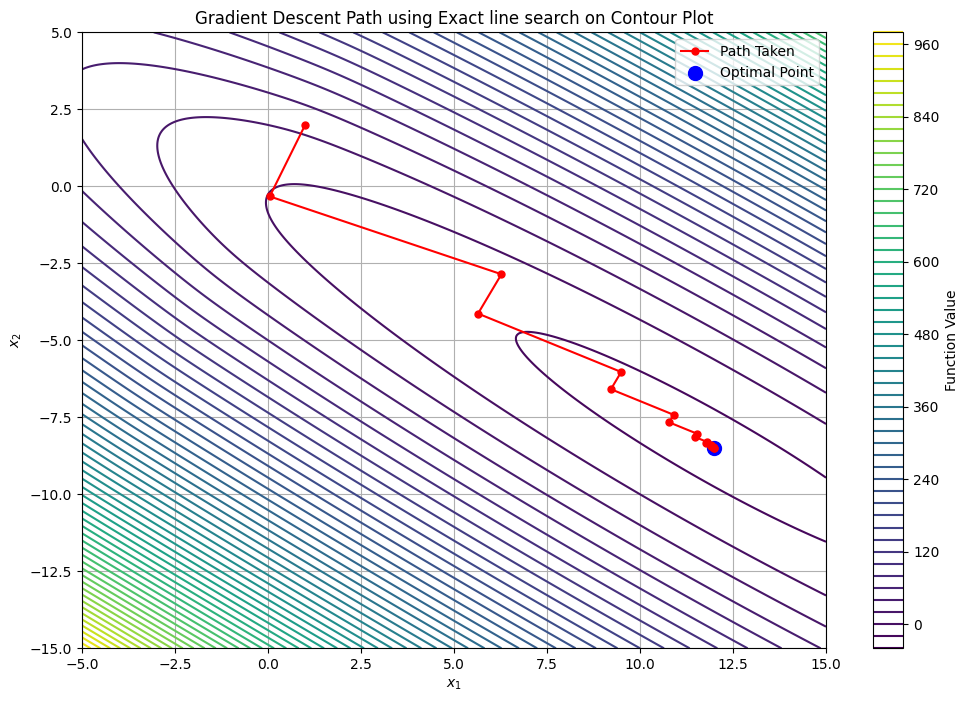

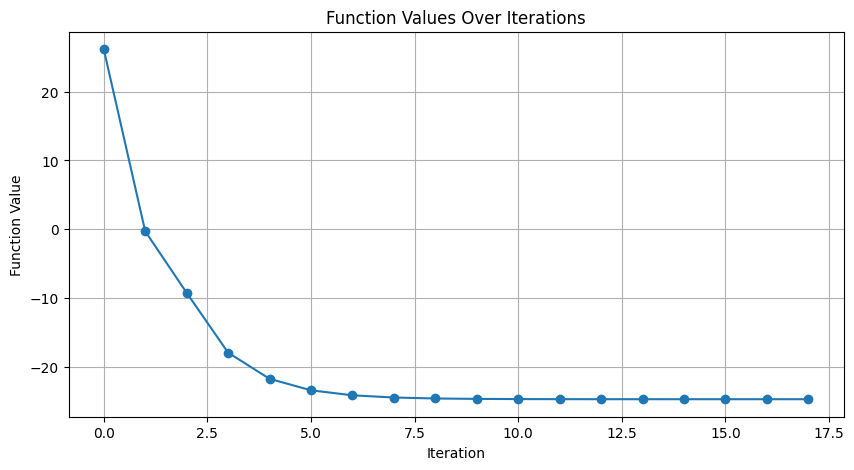

In [ ]:
path = np.array(path)
x1_vals = path[:, 0]
x2_vals = path[:, 1]

x1_range = np.linspace(-5, 15, 400)
x2_range = np.linspace(-15, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = np.array([[func(np.array([x1, x2]), np.array(P)) for x1 in x1_range] for x2 in x2_range])

plt.figure(figsize=(12, 8))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.plot(x1_vals, x2_vals, marker='o', color='red', markersize=5, label='Path Taken')
plt.scatter(optimal_x[0], optimal_x[1], color='blue', label='Optimal Point', s=100)
plt.title('Gradient Descent Path using Exact line search on Contour Plot')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(vlaue, marker='o')
plt.title('Function Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid()
plt.show()

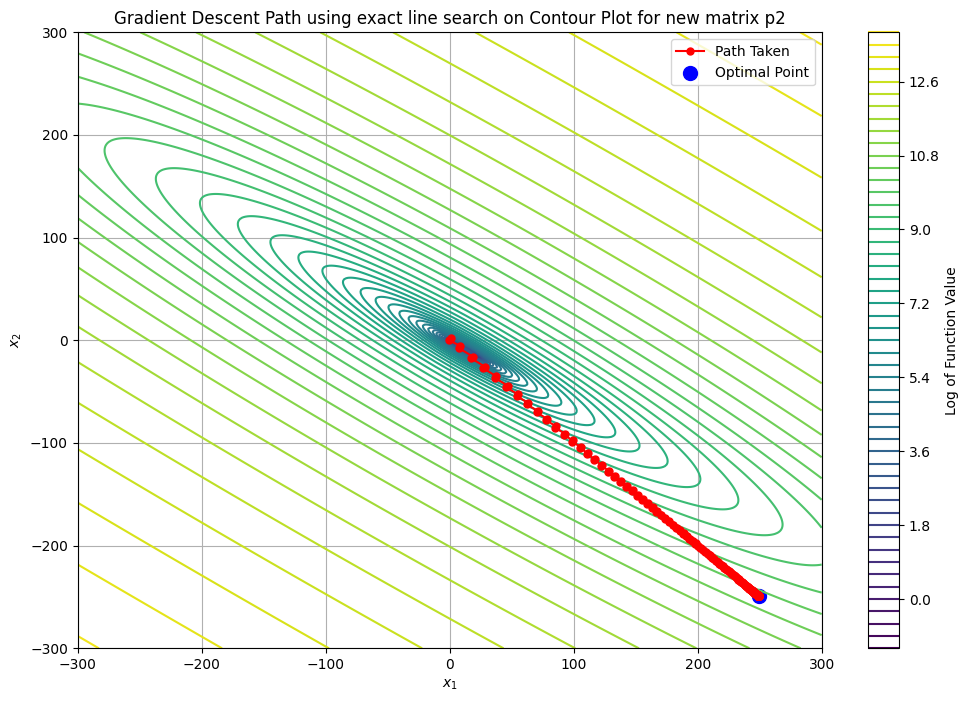

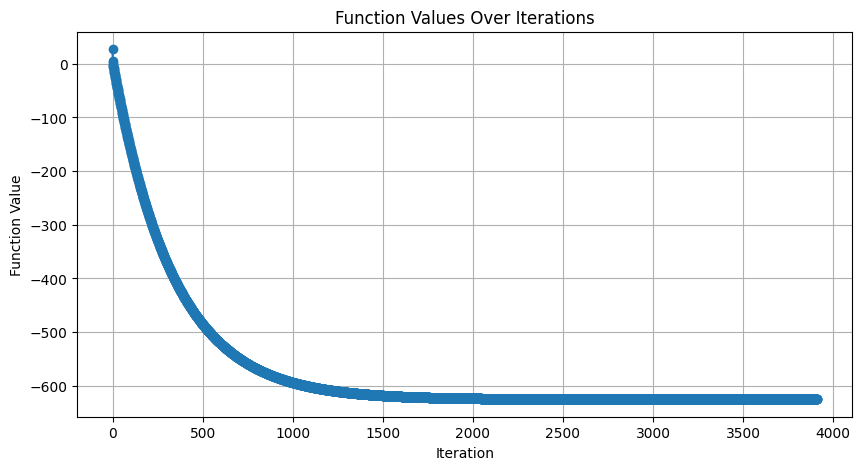

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

path_new_p2 = np.array(path_for_p2)
x1_vals = path_new_p2[:, 0]
x2_vals = path_new_p2[:, 1]

x1_range = np.linspace(-300, 300, 400)
x2_range = np.linspace(-300, 300, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)

Z = np.array([[np.log(np.abs(func(np.array([x1, x2]), np.array(P))) + 1e-6) for x1 in x1_range] for x2 in x2_range])

plt.figure(figsize=(12, 8))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Log of Function Value')
plt.plot(x1_vals, x2_vals, marker='o', color='red', markersize=5, label='Path Taken')
plt.scatter(optimal_x_for_p2[0], optimal_x_for_p2[1], color='blue', label='Optimal Point', s=100)
plt.title('Gradient Descent Path using exact line search on Contour Plot for new matrix p2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(value_backtracking_for_p2, marker='o')
plt.title('Function Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid()
plt.show()


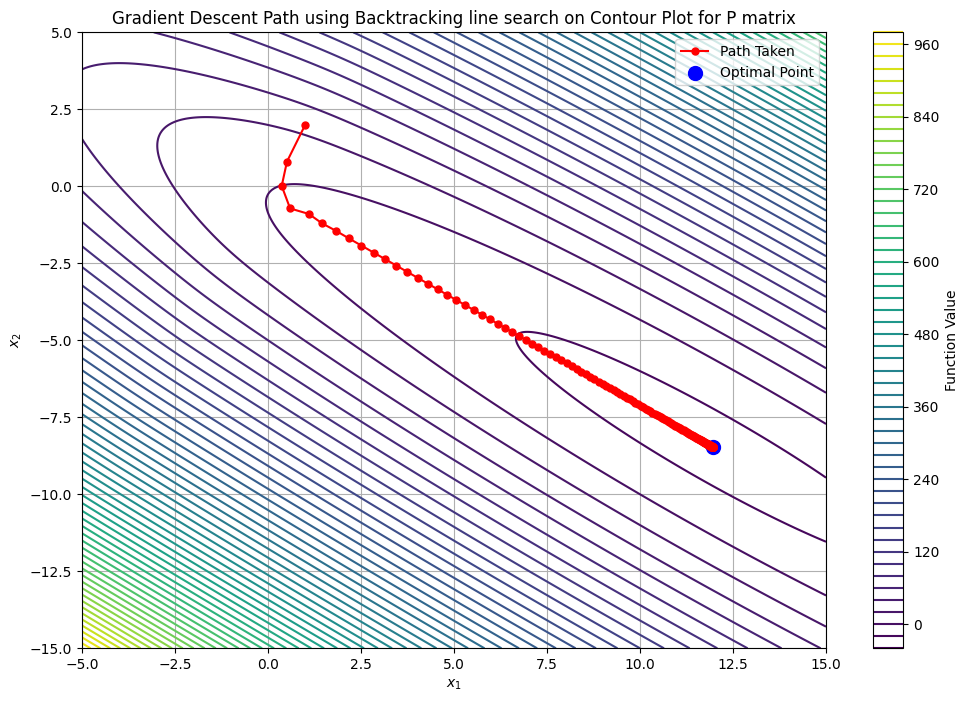

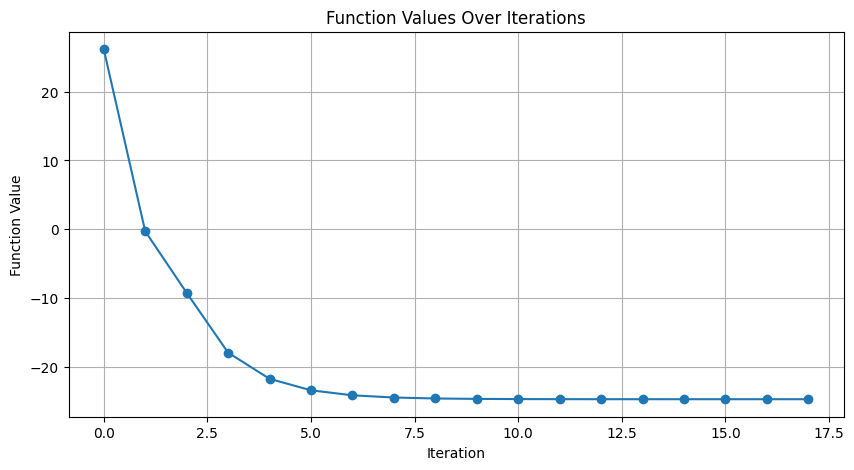

In [ ]:
path_backtracking_graph = np.array(path_backtracking)
x1_vals = path_backtracking_graph[:, 0]
x2_vals = path_backtracking_graph[:, 1]

x1_range = np.linspace(-5, 15, 400)
x2_range = np.linspace(-15, 5, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = np.array([[func(np.array([x1, x2]), np.array(P)) for x1 in x1_range] for x2 in x2_range])

plt.figure(figsize=(12, 8))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function Value')
plt.plot(x1_vals, x2_vals, marker='o', color='red', markersize=5, label='Path Taken')
plt.scatter(optimal_x_backtracking[0], optimal_x_backtracking[1], color='blue', label='Optimal Point', s=100)
plt.title('Gradient Descent Path using Backtracking line search on Contour Plot for P matrix')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(vlaue, marker='o')
plt.title('Function Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid()
plt.show()

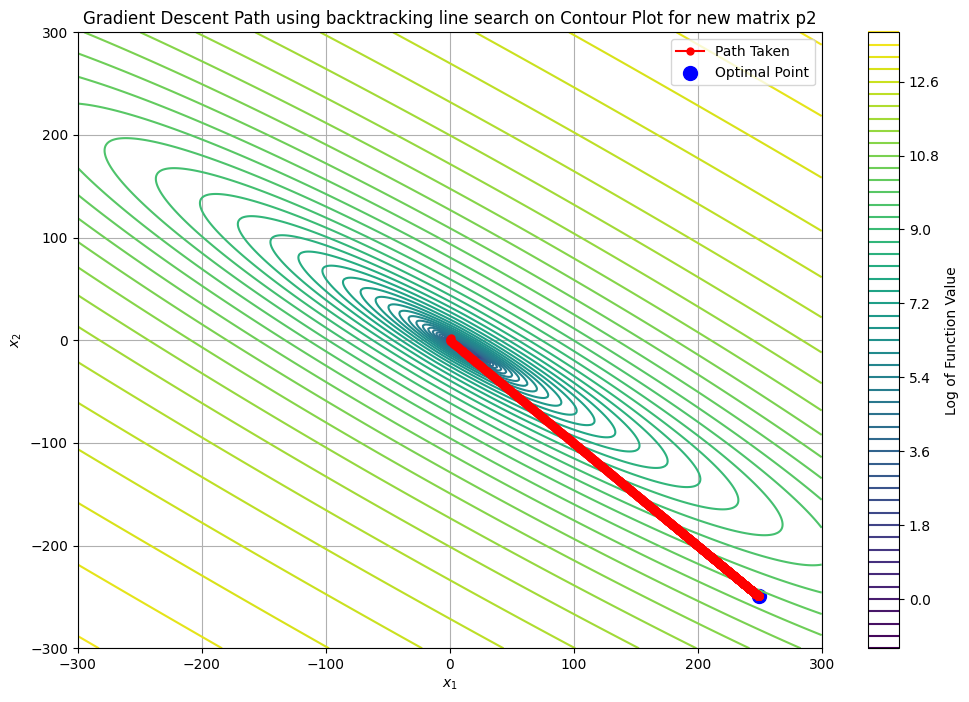

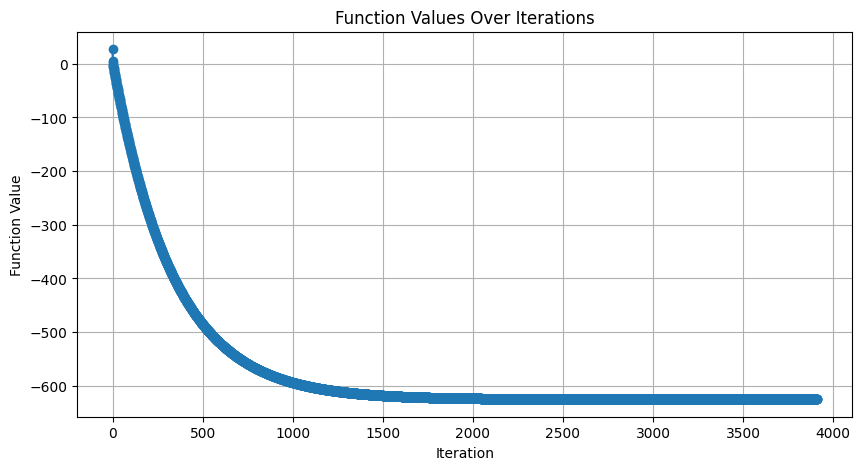

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

path_p2 = np.array(path_backtracking_for_p2)
x1_vals = path_p2[:, 0]
x2_vals = path_p2[:, 1]

x1_range = np.linspace(-300, 300, 400)
x2_range = np.linspace(-300, 300, 400)
X1, X2 = np.meshgrid(x1_range, x2_range)

Z = np.array([[np.log(np.abs(func(np.array([x1, x2]), np.array(P))) + 1e-2) for x1 in x1_range] for x2 in x2_range])

plt.figure(figsize=(12, 8))
plt.contour(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Log of Function Value')
plt.plot(x1_vals, x2_vals, marker='o', color='red', markersize=5, label='Path Taken')
plt.scatter(optimal_x_backtracking_for_p2[0], optimal_x_backtracking_for_p2[1], color='blue', label='Optimal Point', s=100)
plt.title('Gradient Descent Path using backtracking line search on Contour Plot for new matrix p2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(value_backtracking_for_p2, marker='o')
plt.title('Function Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.grid()
plt.show()


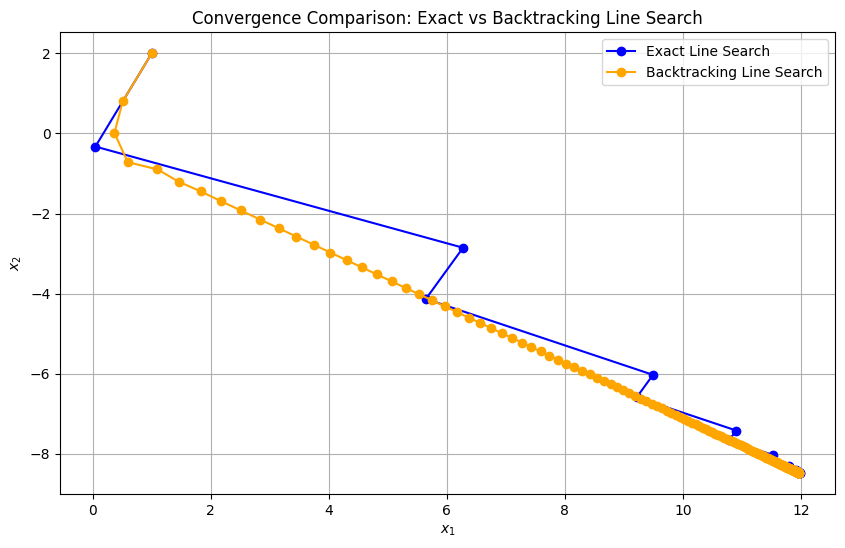

In [ ]:
path_backtracking = np.array(path_backtracking)
path_exact = np.array(path)

plt.figure(figsize=(10, 6))
plt.plot(path_exact[:, 0], path_exact[:, 1], label='Exact Line Search', marker='o', color='blue')
plt.plot(path_backtracking[:, 0], path_backtracking[:, 1], label='Backtracking Line Search', marker='o', color='orange')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Convergence Comparison: Exact vs Backtracking Line Search')
plt.legend()
plt.grid()
plt.show()

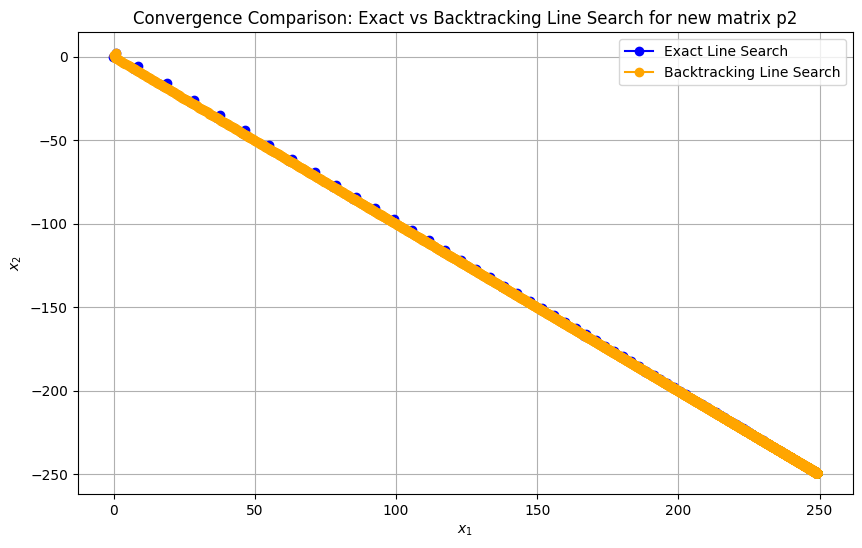

In [ ]:
path_backtracking_p2 = np.array(path_backtracking_for_p2)
path_exact_p2 = np.array(path_for_p2)

plt.figure(figsize=(10, 6))
plt.plot(path_exact_p2[:, 0], path_exact_p2[:, 1], label='Exact Line Search', marker='o', color='blue')
plt.plot(path_backtracking_p2[:, 0], path_backtracking_p2[:, 1], label='Backtracking Line Search', marker='o', color='orange')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Convergence Comparison: Exact vs Backtracking Line Search for new matrix p2')
plt.legend()
plt.grid()
plt.show()